In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
print(df.shape, ' :data shape')
df.head()

(2823, 25)  :data shape


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.drop(columns=['ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], inplace = True)

In [4]:
df.drop(columns=['PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ORDERDATE', 'ORDERNUMBER', 'ORDERLINENUMBER'], inplace = True)

In [5]:
df.head()

,QUANTITYORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,DEALSIZE
0,30,95.70,2871.00,Shipped,1,2,2003,95,Small
1,34,81.35,2765.90,Shipped,2,5,2003,95,Small
2,41,94.74,3884.34,Shipped,3,7,2003,95,Medium
3,45,83.26,3746.70,Shipped,3,8,2003,95,Medium
4,49,100.00,5205.27,Shipped,4,10,2003,95,Medium


In [6]:
# Converting DEALSIZE into usable form
df["DEALSIZE"] = df["DEALSIZE"].astype('category')
technology_status = pd.get_dummies(df["DEALSIZE"], drop_first = True)
df = pd.concat((df, technology_status), axis=1)

In [7]:
# Converting STATUS into usable form
df["STATUS"] = df["STATUS"].astype('category')
technology_status = pd.get_dummies(df["STATUS"], drop_first = True)
df = pd.concat((df, technology_status), axis=1)

In [8]:
# Droping the unneccessary columns
df.drop(columns=["STATUS", "DEALSIZE"], inplace = True)

In [9]:
df.shape

(2823, 14)

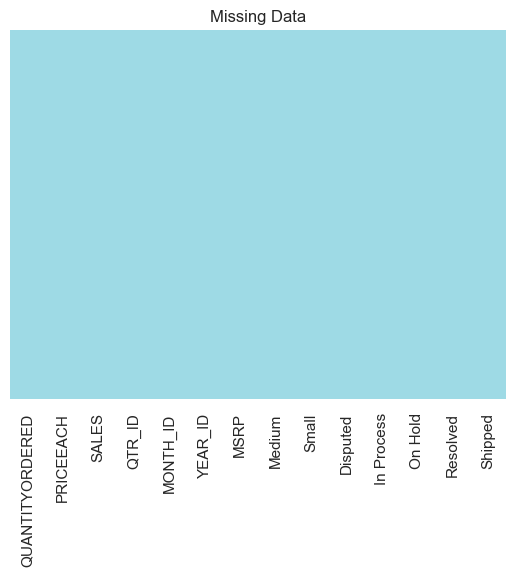

In [10]:
# Checking if there are any missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="tab20_r")
plt.title("Missing Data")
plt.show()
# So no missing value atleast half work is already done. Thank God

In [11]:
onlyNumbers = df.select_dtypes(include=['number'])
Q1 = onlyNumbers.quantile(0.25)
Q3 = onlyNumbers.quantile(0.75)
IQR = Q3-Q1
print('IQR', IQR)
# The IQR looks good to me...

IQR QUANTITYORDERED      16.00
PRICEEACH            31.14
SALES              2304.57
QTR_ID                2.00
MONTH_ID              7.00
YEAR_ID               1.00
MSRP                 56.00
dtype: float64


In [12]:
# Now almost there, EDA is almost done
df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
MSRP                 int64
Medium                bool
Small                 bool
Disputed              bool
In Process            bool
On Hold               bool
Resolved              bool
Shipped               bool
dtype: object

In [13]:
df.head()

,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Medium,Small,Disputed,In Process,On Hold,Resolved,Shipped
0,30,95.70,2871.00,1,2,2003,95,False,True,False,False,False,False,True
1,34,81.35,2765.90,2,5,2003,95,False,True,False,False,False,False,True
2,41,94.74,3884.34,3,7,2003,95,True,False,False,False,False,False,True
3,45,83.26,3746.70,3,8,2003,95,True,False,False,False,False,False,True
4,49,100.00,5205.27,4,10,2003,95,True,False,False,False,False,False,True


In [14]:
# Removing unnessary Data
df.drop(columns=["QTR_ID", "MSRP", "Disputed", "In Process", "On Hold", "Resolved", "Shipped", "MONTH_ID"], inplace= True)

In [15]:
correlation = df.corr()

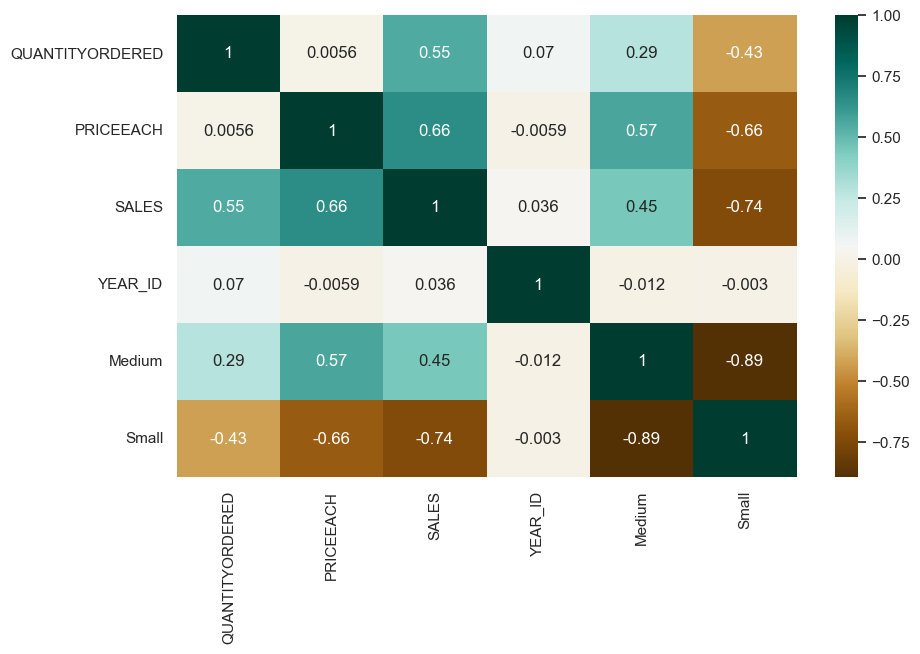

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, cmap="BrBG", annot = True)
plt.show()

In [17]:
X = df.drop("SALES", axis = 1)
y = df["SALES"]

In [18]:
# Standardizing y
y_reshaped = np.array(y).reshape(-1, 1)

pre_process = StandardScaler().fit(y_reshaped)
y_transform = pre_process.fit_transform(y_reshaped)

In [19]:
# Standardizing X
pre_process = StandardScaler().fit(X)
X_transform = pre_process.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=101)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)
print(y_pred)

[[ 0.53858657]
 [ 0.27506224]
 [ 0.50869538]
 [ 0.18828257]
 [-0.78074914]
 [ 2.55308586]
 [ 0.18780962]
 [-0.8653889 ]
 [-1.17028076]
 [ 2.55261291]
 [-1.55380716]
 [ 0.62810168]
 [-1.34941331]
 [-0.37435964]
 [ 0.76419463]
 [-0.01514743]
 [-0.83823325]
 [ 2.38356086]
 [-0.62208188]
 [-0.86377321]
 [ 0.42467167]
 [-0.44916177]
 [ 0.28836147]
 [ 0.25561962]
 [ 0.60462741]
 [-0.60930423]
 [-0.91644836]
 [-0.48764556]
 [ 0.18780962]
 [ 0.51545744]
 [ 0.26285729]
 [-0.88796837]
 [-0.49819897]
 [ 0.89981464]
 [ 0.66295258]
 [-0.55956395]
 [ 0.96715169]
 [-1.19261484]
 [ 0.49342758]
 [-1.38249513]
 [-0.99563507]
 [ 0.37250268]
 [-1.01168764]
 [ 0.66247963]
 [ 0.73076258]
 [ 0.32390257]
 [-0.93849103]
 [ 0.87027368]
 [-0.99452292]
 [-0.705405  ]
 [ 0.66247963]
 [ 0.2216993 ]
 [-0.49185103]
 [ 1.97670085]
 [ 0.2814562 ]
 [ 0.25561962]
 [-0.51045259]
 [ 0.73028963]
 [-0.66584492]
 [ 0.89934169]
 [-0.32997527]
 [ 0.35780757]
 [ 0.35876891]
 [-0.51161065]
 [-1.30539716]
 [ 0.23397595]
 [ 0.79857

In [40]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 0.13884256518206564
R-squared Score: 0.8671020683698358


In [51]:
y_test = np.array(y_test).ravel()  
y_pred = np.array(y_pred).ravel()

In [63]:
Q1 = y[y < 6500].median()
Q3 = y[y > 6500].median()
IQR = Q3 - Q1
print("Q1 Median: ", Q1)
print("Q3  Median: ", Q3 )
print("IQR: ", IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('lower_bound', lower_bound)
print('upper_bound', upper_bound)

outliers = [x for x in X if x < lower_bound or x > upper_bound]
print("Outliers:", outliers)

Q1 Median:  3038.9
Q3  Median:  7483.98
IQR:  4445.08
lower_bound -3628.72
upper_bound 14151.599999999999


TypeError: '<' not supported between instances of 'str' and 'float'

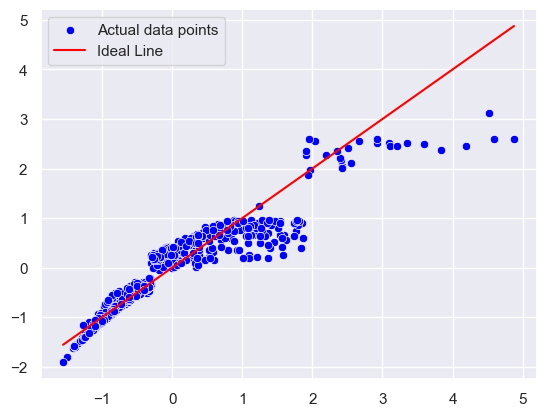

In [47]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual data points')
plt.plot([min(y_test),max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


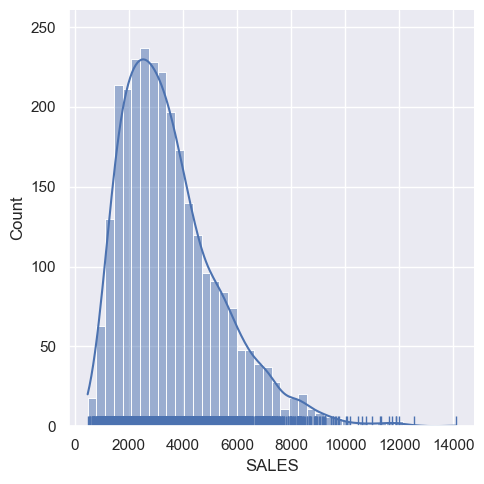

In [42]:
# Sales progress
sns.displot(df["SALES"], kde=True, rug=True)
plt.show()